<a href="https://colab.research.google.com/github/Ad2891/Slutuppgift-team12/blob/main/Slutuppgift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Slutuppgift 1 - Identifying Employee Attrition 

## The Problem Question

During this task, it is our goal to identify features of interest that can be used to predict the reasons for employee attrition. So the question used for this problem is:

>**How can prior indicators from features be used to predict if an employee is at risk of leaving the company?**
>
>**How a prediction can be used to understand the risk of employee attrition?**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

First we retrieve the data.

In [2]:
#Import .csv file and save in variable employee_data 
employee_data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Converting string text into dummy variables

In order to see correlation between the features, we have to be able to compare the values. As many of the features contain text as a value, it difficult to do this comparison. To combat this, we use dummy variable in there place. As all the features that contain text use a predefine value, we are able to use dummy in their place as we know what values are found in each feature.

### Dummy for features with only two options

We are able to use an already existing function to convert the values of features "Gender", "Attrition", "OverTime" and "Over18" as these only contain values "Male" and "Female" for the "Gender" feature, and "Yes" and "No" for the others.

Something to note is that this will change the name of the columns to that of the old name and the first value in the column (ex. "Attrition" --> "Attrition_Yes"). We change that at the end of this section.

In [3]:
#Create dummy feature for the feature "Attrition" and then drop it
employee_data_attrition_dummy = pd.get_dummies(employee_data, columns=['Attrition'],
                                               drop_first=True)

In [4]:
#Create dummy feature for the feature "Gender" and then drop it
employee_data_attrition_gender_dummy = pd.get_dummies(employee_data_attrition_dummy,
                                                      columns=['Gender'], drop_first=True) 

In [5]:
#Create dummy feature for the feature "Over18" and then drop it
employee_data_attrition_gender_over_dummy = pd.get_dummies(employee_data_attrition_gender_dummy, 
                         columns=['Over18'], drop_first=True)

Something to note is that the feature 'Over18' only contains one value ('Y') so the column will be dropped with no dummy feature taking its place. This isn't a problem as the feature would not have influenced our result.

In [6]:
#Create dummy feature for the feature "OverTime" and then drop it
employee_data_attrition_gender_over_time_dummy = pd.get_dummies(employee_data_attrition_gender_over_dummy, 
                         columns=['OverTime'], drop_first=True)

All that is left is to rename the now columns to their prior names.

In [7]:
employee_data_attrition_gender_over_time_dummy.rename(columns={'Attrition_Yes': 'Attrition',
                                                               'Gender_Male': 'Gender',
                                                               'OverTime_Yes': 'OverTime'},
                                                      inplace = True)

This is a tool tip for understanding the values:

>"Attrition": 1 = Yes, 0 = No
>
>"Gender": 1 = Male, 0 = Female
>
>"OverTime_Yes" = 1 = Yes, 0 = No

### Dummy for features with more then two options

As some features have more then two unique values in them, we cannot use the previous method. Instead, we will have change them manually. Each of the changes will occur in a new dataframe.

In [8]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dummy = employee_data_attrition_gender_over_time_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dummy.loc[
                employee_data_attrition_gender_over_time_business_dummy['BusinessTravel'] 
                == 'Travel_Rarely', 'BusinessTravel'] = 3
employee_data_attrition_gender_over_time_business_dummy.loc[
                employee_data_attrition_gender_over_time_business_dummy['BusinessTravel'] 
                == 'Travel_Frequently', 'BusinessTravel'] = 2
employee_data_attrition_gender_over_time_business_dummy.loc[
                employee_data_attrition_gender_over_time_business_dummy['BusinessTravel'] 
                == 'Non-Travel', 'BusinessTravel'] = 1

In [9]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_dummy = employee_data_attrition_gender_over_time_business_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_dummy['Department'] 
                == 'Sales', 'Department'] = 3
employee_data_attrition_gender_over_time_business_dep_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_dummy['Department'] 
                == 'Research & Development', 'Department'] = 2
employee_data_attrition_gender_over_time_business_dep_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_dummy['Department'] 
                == 'Human Resources', 'Department'] = 1

In [10]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_educ_dummy = employee_data_attrition_gender_over_time_business_dep_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Technical Degree', 'EducationField'] = 6
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Other', 'EducationField'] = 5
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Medical', 'EducationField'] = 4
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Marketing', 'EducationField'] = 3
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Life Sciences', 'EducationField'] = 2
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Human Resources', 'EducationField'] = 1

In [11]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy = employee_data_attrition_gender_over_time_business_dep_educ_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Sales Representative', 'JobRole'] = 9
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Sales Executive', 'JobRole'] = 8
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Research Scientist', 'JobRole'] = 7
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Research Director', 'JobRole'] = 6
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Manufacturing Director', 'JobRole'] = 5
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Manager', 'JobRole'] = 4
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Laboratory Technician', 'JobRole'] = 3
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Human Resources', 'JobRole'] = 2
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Healthcare Representative', 'JobRole'] = 1

In [12]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy = employee_data_attrition_gender_over_time_business_dep_educ_job_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy['MaritalStatus'] 
                == 'Single', 'MaritalStatus'] = 3
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy['MaritalStatus'] 
                == 'Married', 'MaritalStatus'] = 2
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy['MaritalStatus'] 
                == 'Divorced', 'MaritalStatus'] = 1

In [13]:
#rename the last dataframe
employee_data_dummies = employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy

These changes have not changed the dtype of the features so we will have to change it manually. Not doing this would mean a correlation could not be established.

In [14]:
employee_data_dummies = employee_data_dummies.astype({'Department' : int})
employee_data_dummies = employee_data_dummies.astype({'BusinessTravel' : int})
employee_data_dummies = employee_data_dummies.astype({'EducationField' : int})
employee_data_dummies = employee_data_dummies.astype({'JobRole' : int})
employee_data_dummies = employee_data_dummies.astype({'MaritalStatus' : int})

## Removing unnecessary features

As many of the features in the dataframe are linked others, it will require us to remove a number of them to reduce the redundance and avoid using the same variables twice in our prediction model. We have already removed 'Over18' as it only contained one unique variable. 'StandardHours' and 'EmployeeCount' have the same issue with only one unique value.

We can also use the function ".corr()" to see the correlation between features. Features that have a low value (<0.25) with any other feature **and** are not reflected in other features, will removed as we are not able to use them for our analysis.

In [15]:
pd.set_option('display.max_columns', None)
employee_data_dummies.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,-0.036311,0.028062
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.000074,-0.032981,0.016543
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652,-0.011716,0.009135
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.063991,-0.041583,0.007481
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,-0.001851,0.025514
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,-0.016547,-0.020322
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.026846,-0.002504,0.002259
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577,0.022556,-0.024037
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369,0.000508,0.070132


In [16]:
employee_data_dummies['JobLevel'].unique()

array([2, 1, 3, 4, 5])

After analysing the results, we have determined that the following features will be removed:

*   DailyRate: Low values, available in other features.
*   EmployeeNumber: A special case, has nothing to do with the employee and is only used for administrative issues.
*   HourlyRate: Available in other features.
*   MonthlyRate: Available in other features, better to use MonthlyIncome.
*   JobLevel: Does not contain a lot of information and is not connected another valuable feature.
*   MaritalStatus: More to do with outside life, can't really be connected to any other features.
*   PerformanceRating: Has a strong correlation between PercentSalaryHike.
*   RelationshipSatisfaction: To do with outside life, can't really be connected to other features.
*   NumCompaniesWorked: Has correlation to working years and not really useful for understanding why people leave.
*   TrainingTimesLastYear: Has no correlation to other features and not relevant to Attrition.
*   TotalWorkingYears: Not relevant as we have age (better indicator for retirment) and years at company.
*   YearsInCurrentRole: We have the employees role and their years since last promotion.


In [17]:
#Drop columns
employee_data_dummies.drop(columns=['StandardHours', 'EmployeeCount', 'DailyRate',
                                    'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
                                    'JobLevel', 'MaritalStatus', 'PerformanceRating',
                                    'RelationshipSatisfaction', 'NumCompaniesWorked',
                                    'TrainingTimesLastYear', 'TotalWorkingYears',
                                    'YearsInCurrentRole'], inplace = True)

In [18]:
employee_data_dummies.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
0,41,3,3,1,2,2,2,3,8,4,5993,11,0,1,6,0,5,1,0,1
1,49,2,2,8,1,2,3,2,7,2,5130,23,1,3,10,1,7,0,1,0
2,37,3,2,2,2,5,4,2,3,3,2090,15,0,3,0,0,0,1,1,1
3,33,2,2,3,4,2,4,3,7,3,2909,11,0,3,8,3,0,0,0,1
4,27,3,2,2,1,4,1,3,3,2,3468,12,1,3,2,2,2,0,1,0


## Cleaning the data

Before using the data to find any correlation, we need to make sure there is no null values as this would negatively affect the analysis

## Visualising the amount of data

Before moving forward, it would be good see the distrubtion of the data for each feature. We will have to do this separately for categorical and continuous data.

We first visualise the categorical data below (note that this will be separated into two code blocks as the function can only take 12 values max):

In [49]:
#Function for plotting categorial features
def countplot(df, independent_features):
  #create figure with wid=25, len=25
  plt.figure(figsize=(25, 25))
  #go throught the list of values
  for loc, feature in enumerate(independent_features):
    #create a subdiagram
    ax = plt.subplot(3, 4, loc+1)
    #set the labels for the diagram
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    #count the instances of the date in the feature
    chart = sb.countplot(df[feature])
    #set the measurements for the diagram
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

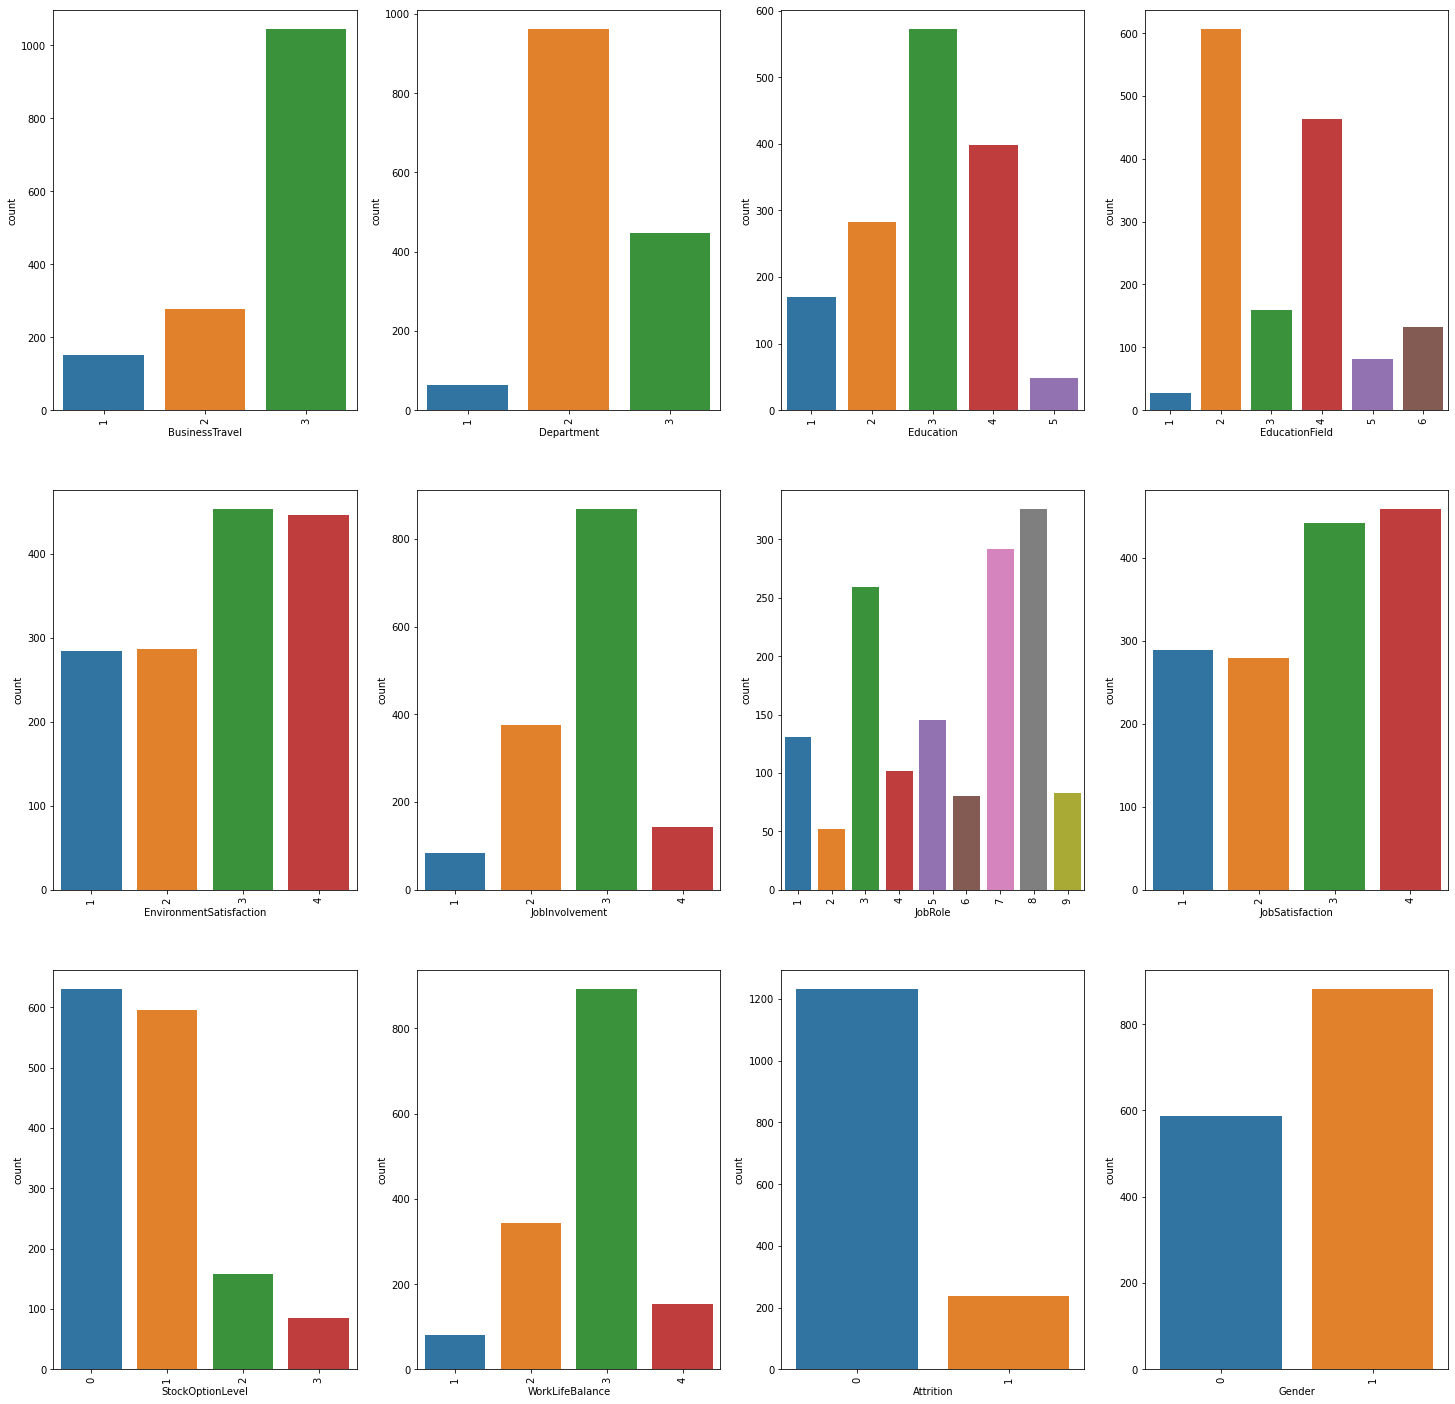

In [50]:
#list of features
cat_features = ["BusinessTravel", "Department", "Education", "EducationField", 
                      "EnvironmentSatisfaction", "JobInvolvement", "JobRole",
                      "JobSatisfaction", "StockOptionLevel", "WorkLifeBalance"
                      , "Attrition", "Gender"]
#call the method
countplot(employee_data_dummies ,cat_features)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


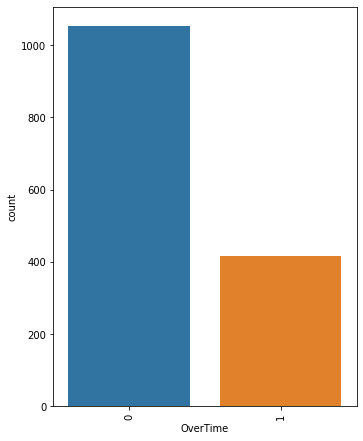

In [51]:
#list of features
cat_features2 = ["OverTime"]
#call the method
countplot(employee_data_dummies, cat_features2)

For continuous data, we use the following codebox to see the distribution:

In [52]:
#Function for plotting continous features
def plot_dist(df, independent_features):
  #create figure with wid=25, len=25
  plt.figure(figsize=(25, 20))
  #go throught the list of values
  for loc, feature in enumerate(independent_features):
    #create a subdiagram
    ax = plt.subplot(3, 3, loc+1)
    sb.distplot(df[feature]) # you can try histplot as well
  return None

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

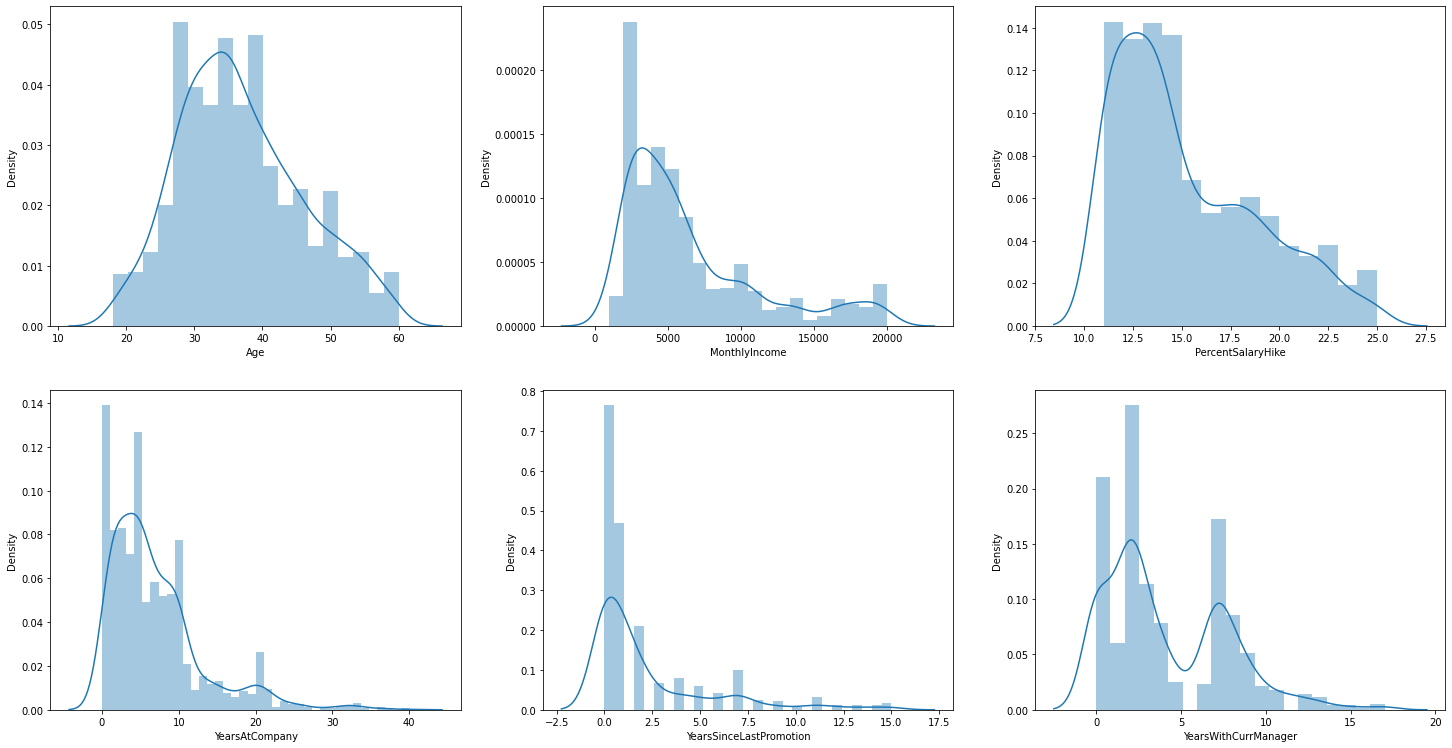

In [53]:
#list of features
continuous_features = ["Age", "MonthlyIncome", "PercentSalaryHike", "YearsAtCompany", 
                       "YearsSinceLastPromotion", "YearsWithCurrManager"]
#call the method
plot_dist(employee_data_dummies, continuous_features)

## Comparing the data of those that are leaving

To fully understand the reasons for attrition, we will have to look at the data of those with a positive value (1) in the "Attrition" feature.

We first separate them from the prior dataframe and save it into a new one:

In [54]:
noattrition_data = employee_data_dummies.loc[employee_data_dummies['Attrition'] == 0]

In [62]:
attrition_data = employee_data_dummies.loc[employee_data_dummies['Attrition'] == 1]
attrition_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
0,41,3,3,1,2,2,2,3,8,4,5993,11,0,1,6,0,5,1,0,1
2,37,3,2,2,2,5,4,2,3,3,2090,15,0,3,0,0,0,1,1,1
14,28,3,2,24,3,2,3,2,3,3,2028,14,0,3,4,0,3,1,1,1
21,36,3,3,9,4,2,3,2,9,1,3407,23,0,3,5,0,3,1,1,0
24,34,3,2,6,1,4,2,3,7,1,2960,11,0,3,4,1,3,1,1,0


We can now look at the correlation to the other features:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

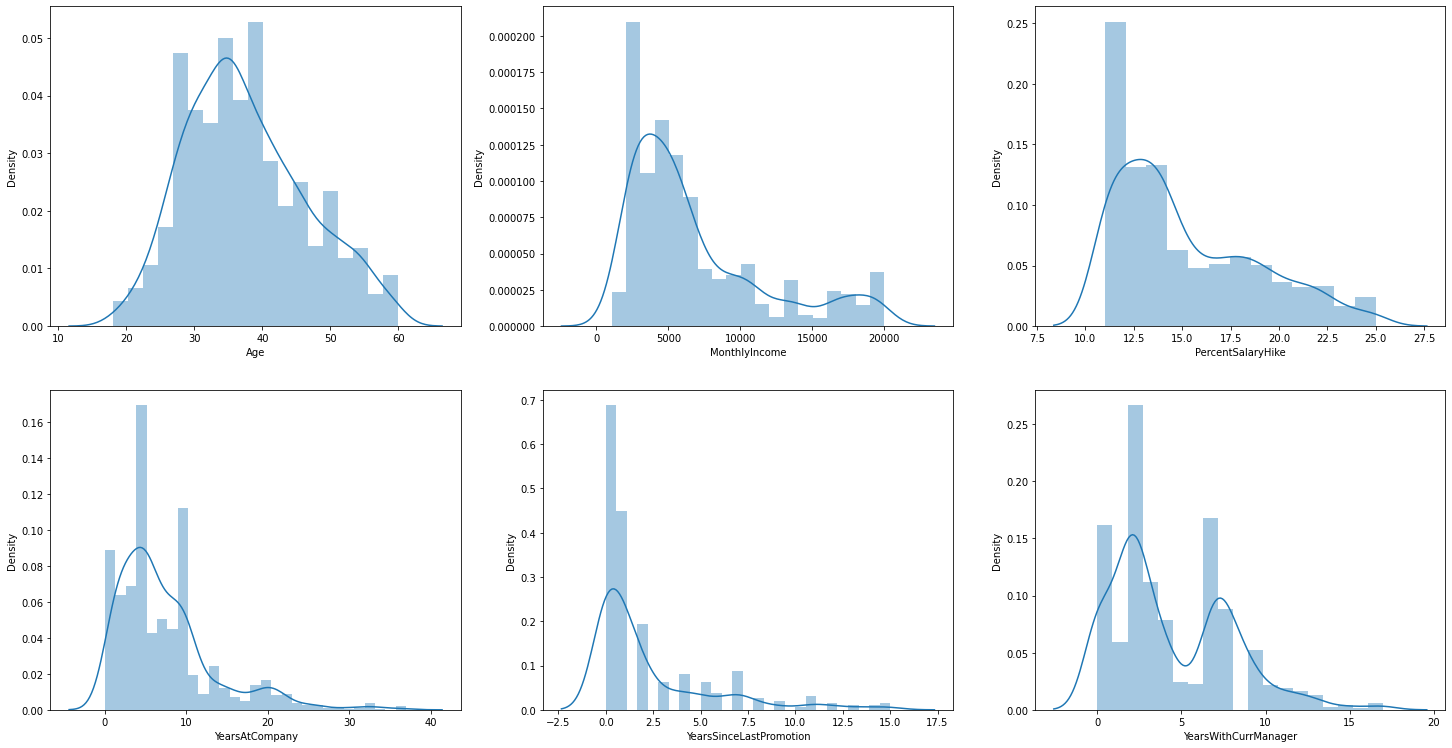

In [56]:
plot_dist(noattrition_data, continuous_features)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

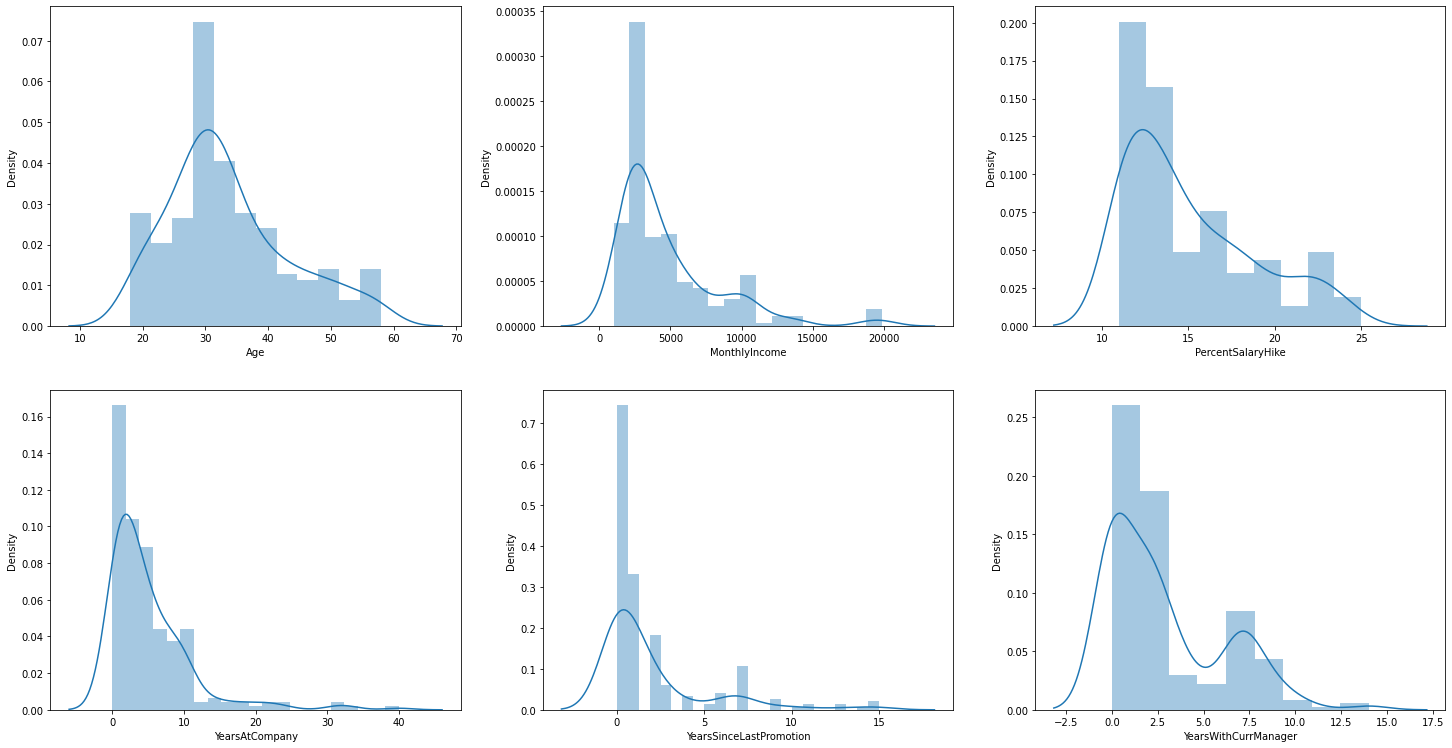

In [57]:
plot_dist(attrition_data, continuous_features)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

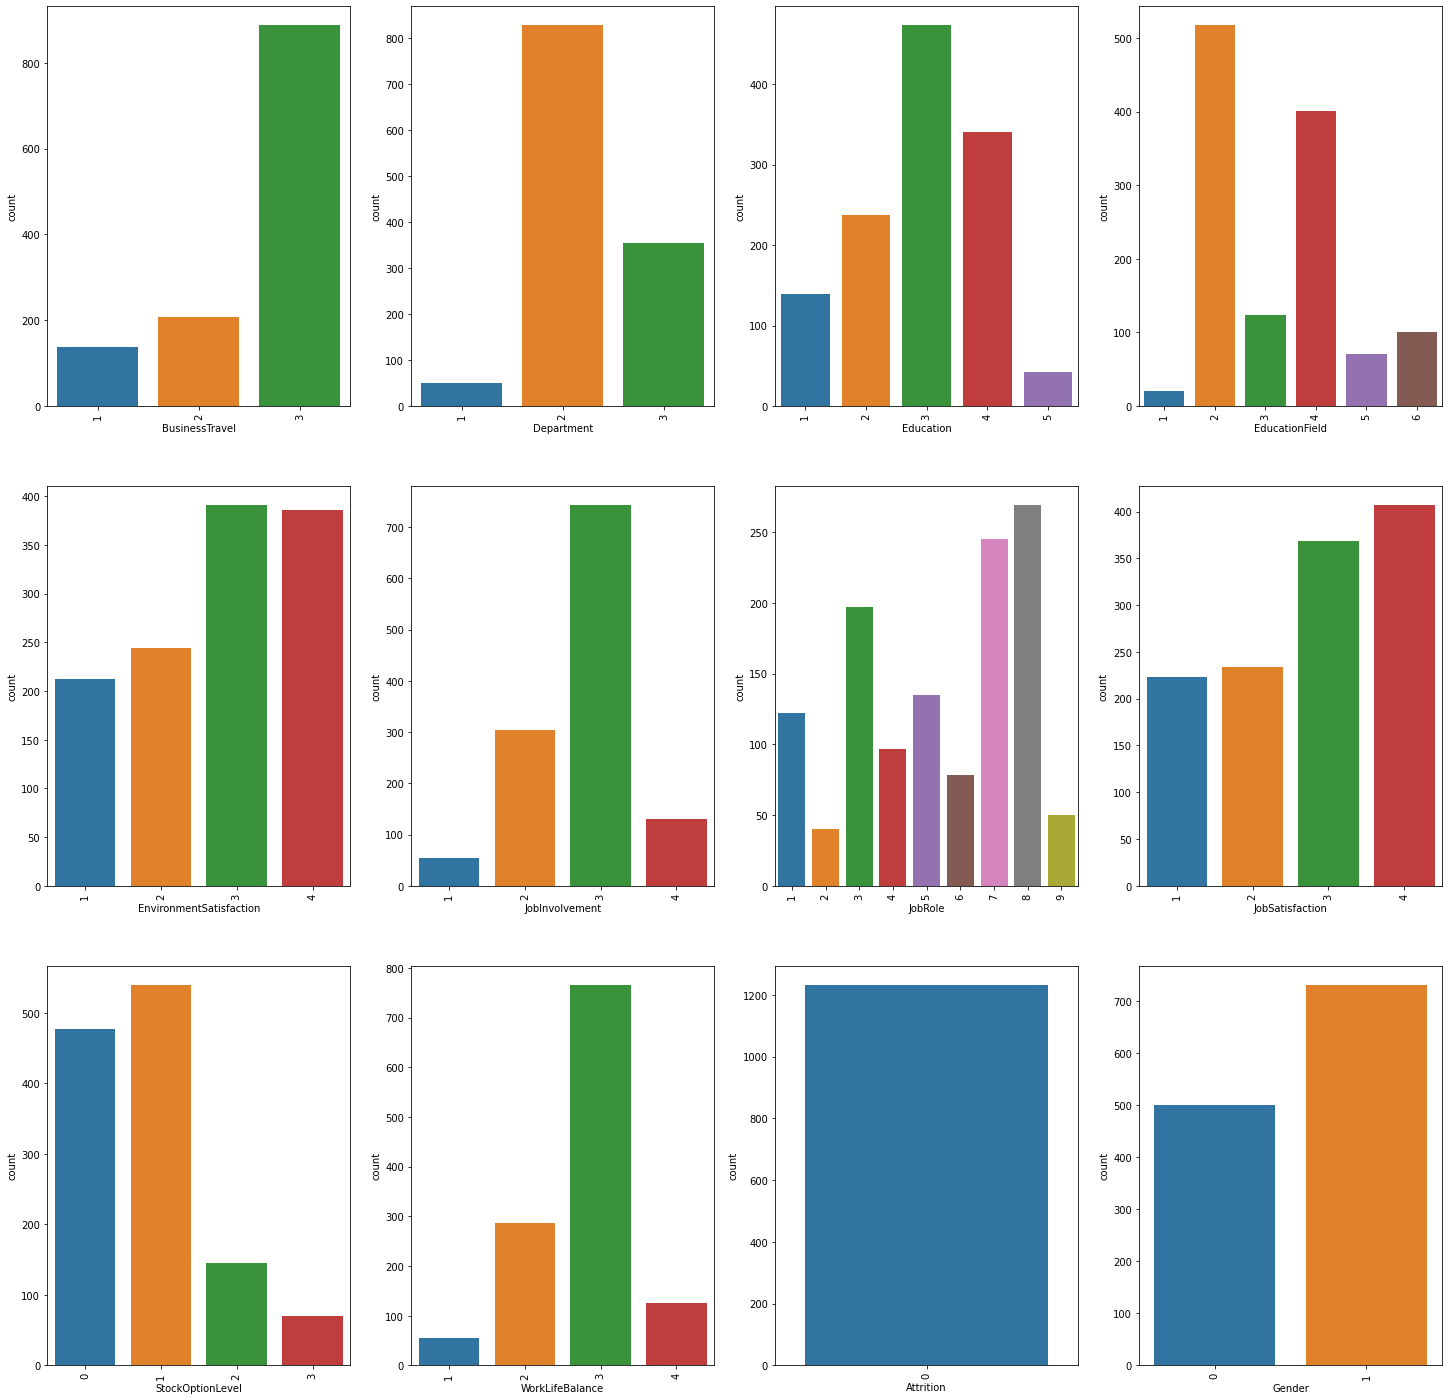

In [58]:
countplot(noattrition_data, cat_features)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

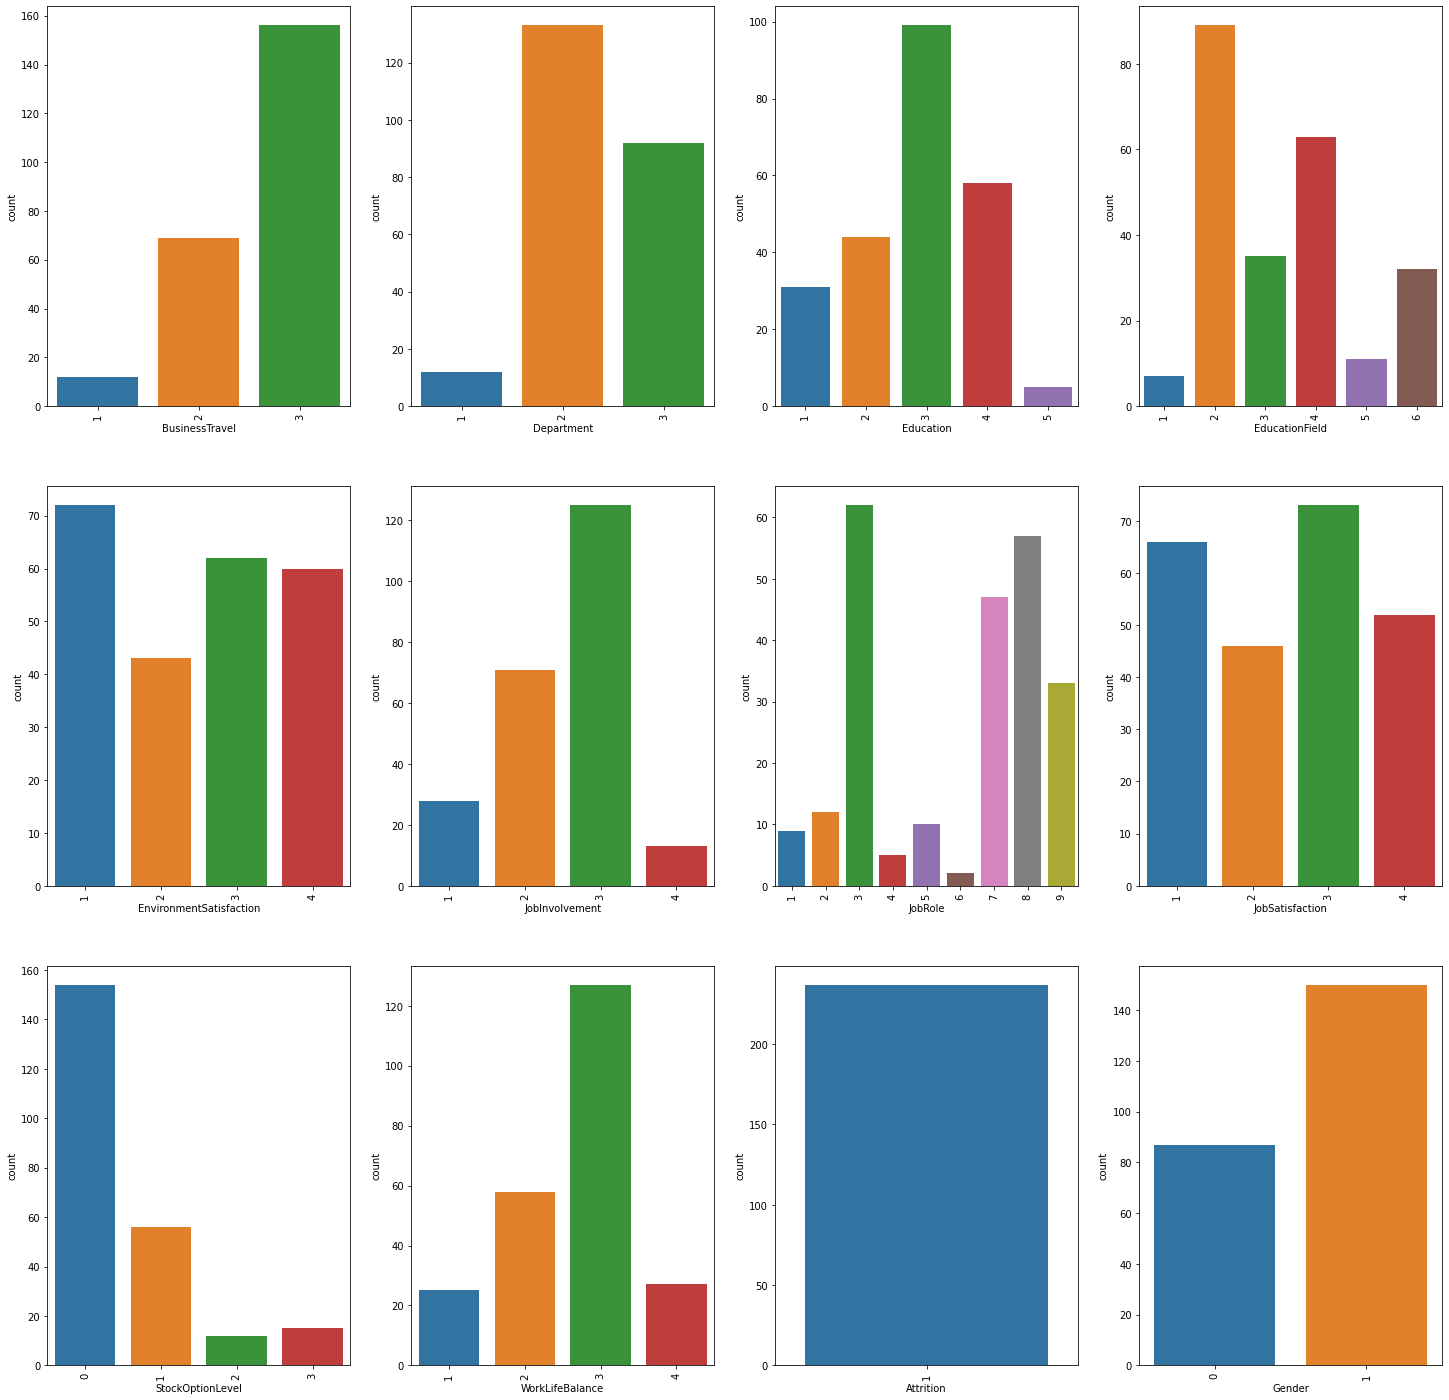

In [59]:
countplot(attrition_data, cat_features)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


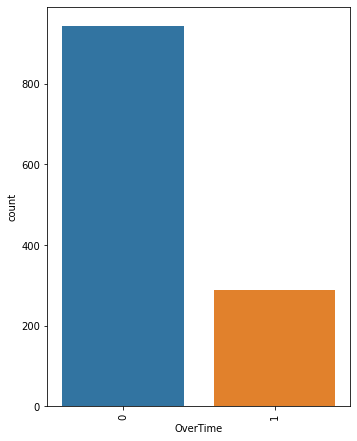

In [63]:
countplot(noattrition_data, cat_features2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


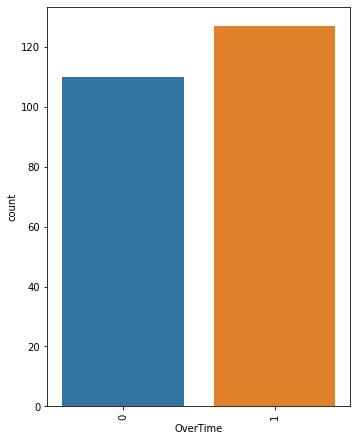

In [64]:
countplot(attrition_data, cat_features2)

From these visualisations, we see that there are certain categorical features that change when someone is planning to leave the company. These features of interest that have seen a value increase are:

*   Department: value 3 (Sales).
*   EnvironmentSatisfaction: value 1.
*   JobRole: value 3 (Lab Technician) and 9 (Sales Representative)
*   JobSatisfaction: value 1.
*   StockOptionLevel: value 0.
*   OverTime: values 1

For continuous features, we also see some changes:

*   Age: lower mean.
*   YearsAtCompany: lower mean.
*   YearsWithCurrManager: lower mean.






## Checking the correlation of the features for Attrition in employees

In [73]:
attrition_data_limited = attrition_data[["Department", "EnvironmentSatisfaction", 
                                        "JobRole", "JobSatisfaction", "StockOptionLevel",
                                        "OverTime", "Age", "YearsAtCompany",
                                        "YearsWithCurrManager"]]
attrition_data_limited.corr()

,Department,EnvironmentSatisfaction,JobRole,JobSatisfaction,StockOptionLevel,OverTime,Age,YearsAtCompany,YearsWithCurrManager
Department,1.000000,0.011854,0.776899,0.056608,-0.053658,0.001942,0.078394,0.058021,0.077443
EnvironmentSatisfaction,0.011854,1.000000,0.088602,0.046915,-0.071978,0.109116,-0.030219,0.031420,0.000282
JobRole,0.776899,0.088602,1.000000,0.018020,-0.064121,0.094978,-0.004459,-0.040552,0.023118
JobSatisfaction,0.056608,0.046915,0.018020,1.000000,0.081676,0.087351,0.031509,0.095849,0.005296
StockOptionLevel,-0.053658,-0.071978,-0.064121,0.081676,1.000000,0.039770,0.150161,0.042120,0.008595
OverTime,0.001942,0.109116,0.094978,0.087351,0.039770,1.000000,-0.000144,-0.086370,-0.006055
Age,0.078394,-0.030219,-0.004459,0.031509,0.150161,-0.000144,1.000000,0.452909,0.336577
YearsAtCompany,0.058021,0.031420,-0.040552,0.095849,0.042120,-0.086370,0.452909,1.000000,0.769296
YearsWithCurrManager,0.077443,0.000282,0.023118,0.005296,0.008595,-0.006055,0.336577,0.769296,1.000000


In [74]:
noattrition_data_limited = noattrition_data[["Department", "EnvironmentSatisfaction", 
                                        "JobRole", "JobSatisfaction", "StockOptionLevel",
                                        "OverTime", "Age", "YearsAtCompany",
                                        "YearsWithCurrManager"]]
noattrition_data_limited.corr()

,Department,EnvironmentSatisfaction,JobRole,JobSatisfaction,StockOptionLevel,OverTime,Age,YearsAtCompany,YearsWithCurrManager
Department,1.000000,-0.018581,0.635106,0.021626,0.007327,-0.011165,-0.045143,0.026524,0.039100
EnvironmentSatisfaction,-0.018581,1.000000,-0.032435,-0.031494,0.002085,0.096733,-0.001000,-0.021621,-0.025595
JobRole,0.635106,-0.032435,1.000000,0.026059,0.001084,0.008212,-0.137573,-0.082454,-0.040833
JobSatisfaction,0.021626,-0.031494,0.026059,1.000000,-0.020536,0.043776,-0.033143,-0.039733,-0.053233
StockOptionLevel,0.007327,0.002085,0.001084,-0.020536,1.000000,0.033594,-0.012452,-0.012100,0.002460
OverTime,-0.011165,0.096733,0.008212,0.043776,0.033594,1.000000,0.087661,0.046295,-0.002759
Age,-0.045143,-0.001000,-0.137573,-0.033143,-0.012452,0.087661,1.000000,0.264745,0.154146
YearsAtCompany,0.026524,-0.021621,-0.082454,-0.039733,-0.012100,0.046295,0.264745,1.000000,0.764309
YearsWithCurrManager,0.039100,-0.025595,-0.040833,-0.053233,0.002460,-0.002759,0.154146,0.764309,1.000000


TODO:

*   Do cleaning (no need to remove outliers; no extreme values
*   Check if there are correlations between the features found in the visualisation.
*   Use the correlations as a test to find people at risk of leaving.
*   Use the describtion and correlation in a separate chapter
*   Use Johannes link to determine the algorithms to use
*   Do a conclusion with an analysis of everythin that happened including ethics. 

QUESTIONS:
*   Can we just remove features without visualising if they have an effect on the attrition outcome?
*   How do we use correlation to see if someone is likely to leave?
*   Vår frågeställning





## Planned Algorithms for Supervised ML

*   Linear Support-vector machines
*   KNeighbors Classifiers
*   Ensemble Classifiers 
*   Random forest classifier

